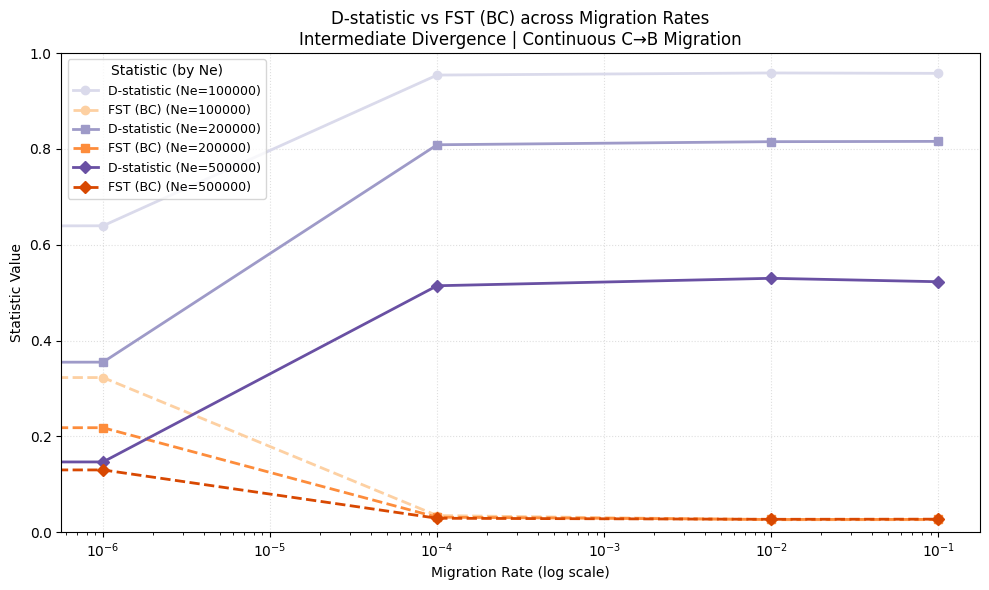

In [28]:
# 5.3.4 Joint Inference Using D and FST

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load simulation summary ===
df = pd.read_csv("results/expanded_grid/summary.csv")

# === Filter: intermediate divergence, continuous, C→B migration ===
filtered = df[
    (df["divergence"] == "intermediate") &
    (df["mig_model"] == "continuous") &
    (df["mig_direction"] == "C_to_B")
].copy()

# === Map categorical mig_rate to numeric values ===
mig_rate_map = {
    "none": 0.0,
    "low": 1e-6,
    "moderate": 1e-4,
    "high": 1e-2,
    "very_high": 1e-1
}
filtered["mig_rate_val"] = filtered["mig_rate"].map(mig_rate_map)

# === Group by Ne and migration rate ===
grouped = (
    filtered.groupby(["Ne", "mig_rate", "mig_rate_val"])
    .agg(
        mean_D=("D", "mean"),
        mean_FST_BC=("FST_BC", "mean")
    )
    .reset_index()
    .sort_values(by=["Ne", "mig_rate_val"])
)

# === Setup plot ===
plt.figure(figsize=(10, 6))
colors_d = sns.color_palette("Purples", n_colors=3)
colors_fst = sns.color_palette("Oranges", n_colors=3)
markers = ["o", "s", "D"]

# === Plot lines for each Ne ===
for i, ne in enumerate(sorted(grouped["Ne"].unique())):
    sub = grouped[grouped["Ne"] == ne]
    
    # Plot D-statistic
    plt.plot(
        sub["mig_rate_val"], sub["mean_D"],
        label=f"D-statistic (Ne={ne})",
        marker=markers[i],
        linestyle='-',
        linewidth=2,
        color=colors_d[i]
    )
    
    # Plot FST (BC)
    plt.plot(
        sub["mig_rate_val"], sub["mean_FST_BC"],
        label=f"FST (BC) (Ne={ne})",
        marker=markers[i],
        linestyle='--',
        linewidth=2,
        color=colors_fst[i]
    )

# === Plot formatting ===
plt.xscale("log")
plt.ylim(0, 1)
plt.xlabel("Migration Rate (log scale)")
plt.ylabel("Statistic Value")
plt.title("D-statistic vs FST (BC) across Migration Rates\nIntermediate Divergence | Continuous C→B Migration")
plt.legend(title="Statistic (by Ne)", fontsize=9)
plt.grid(True, linestyle=":", alpha=0.4)
plt.tight_layout()
plt.savefig("figures/final_insightful_plot_FIXED.png", dpi=300)
plt.show()


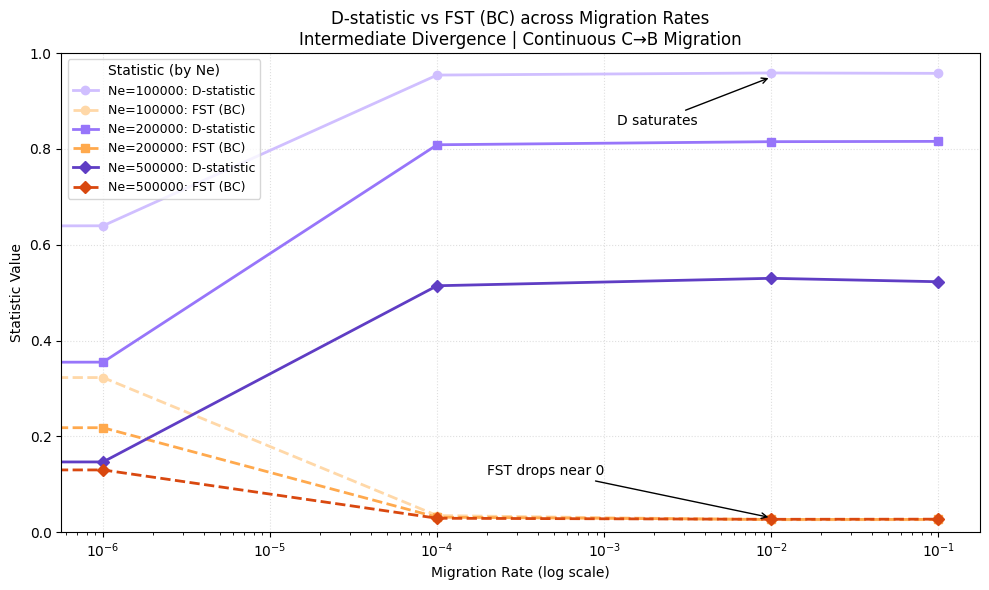

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Load simulation summary ===
df = pd.read_csv("results/expanded_grid/summary.csv")

# === Filter: intermediate divergence, continuous, C→B migration ===
filtered = df[
    (df["divergence"] == "intermediate") &
    (df["mig_model"] == "continuous") &
    (df["mig_direction"] == "C_to_B")
].copy()

# === Map categorical mig_rate to numeric values ===
mig_rate_map = {
    "none": 0.0,
    "low": 1e-6,
    "moderate": 1e-4,
    "high": 1e-2,
    "very_high": 1e-1
}
filtered["mig_rate_val"] = filtered["mig_rate"].map(mig_rate_map)

# === Group by Ne and migration rate ===
grouped = (
    filtered.groupby(["Ne", "mig_rate", "mig_rate_val"])
    .agg(
        mean_D=("D", "mean"),
        mean_FST_BC=("FST_BC", "mean")
    )
    .reset_index()
    .sort_values(by=["Ne", "mig_rate_val"])
)

# === Setup plot ===
plt.figure(figsize=(10, 6))

# Custom color palettes (sorted from light to dark)
colors_d = ["#d0bfff", "#9775fa", "#5f3dc4"]        # Light to dark purple
colors_fst = ["#ffd8a8", "#ffa94d", "#d9480f"]      # Light to dark orange
markers = ["o", "s", "D"]

# === Plot lines for each Ne ===
for i, ne in enumerate(sorted(grouped["Ne"].unique())):
    sub = grouped[grouped["Ne"] == ne]

    # D-statistic line
    plt.plot(
        sub["mig_rate_val"], sub["mean_D"],
        label=f"Ne={ne}: D-statistic",
        marker=markers[i],
        linestyle='-',
        linewidth=2,
        color=colors_d[i]
    )

    # FST line
    plt.plot(
        sub["mig_rate_val"], sub["mean_FST_BC"],
        label=f"Ne={ne}: FST (BC)",
        marker=markers[i],
        linestyle='--',
        linewidth=2,
        color=colors_fst[i]
    )

# === Annotate key behaviors ===
plt.annotate(
    "D saturates",
    xy=(1e-2, 0.95), xytext=(1.2e-3, 0.85),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=10
)

plt.annotate(
    "FST drops near 0",
    xy=(1e-2, 0.03), xytext=(2e-4, 0.12),
    arrowprops=dict(arrowstyle="->", color="black"),
    fontsize=10
)

# === Plot formatting ===
plt.xscale("log")
plt.ylim(0, 1)
plt.xlabel("Migration Rate (log scale)")
plt.ylabel("Statistic Value")
plt.title("D-statistic vs FST (BC) across Migration Rates\nIntermediate Divergence | Continuous C→B Migration")
plt.legend(title="Statistic (by Ne)", fontsize=9, loc="best")
plt.grid(True, linestyle=":", alpha=0.4)
plt.tight_layout()

# === Save figure ===
plt.savefig("figures/final_insightful_plot_annotated_grouped.png", dpi=300)
plt.show()


/Users/rachaelchew/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(
/Users/rachaelchew/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(
/Users/rachaelchew/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(
/Users/rachaelchew/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(
/var/folders/rt/dyvzjjbj3ln8dp3pv22vc9740000gn/T/ipykernel_55723/2516723338.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


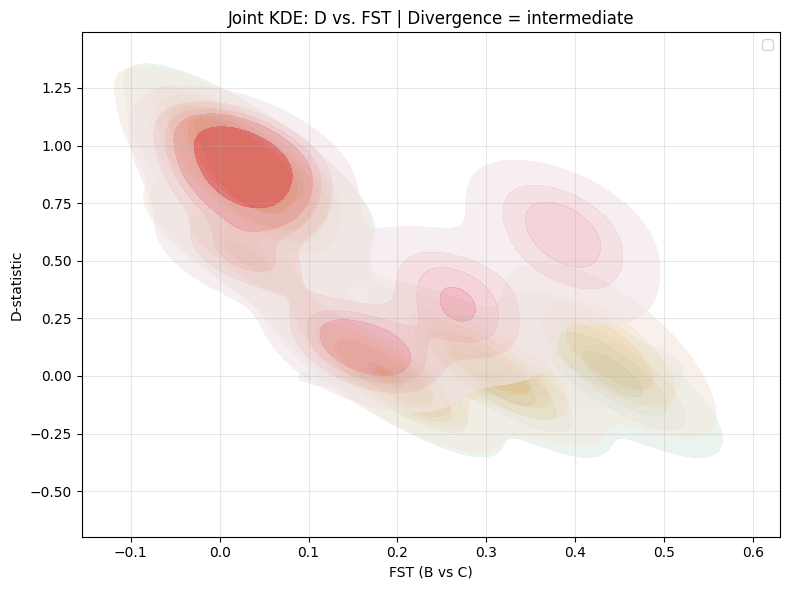

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Load the dataset
df = pd.read_csv("results/expanded_grid/summary.csv")

# Map migration rates to numerical values (for sorting)
mig_rate_map = {
    "none": 0.0,
    "low": 1e-6,
    "moderate": 1e-4,
    "high": 1e-2,
    "very_high": 0.1
}
df["mig_rate_val"] = df["mig_rate"].map(mig_rate_map)

# Create output directory
Path("figures/kde_plots").mkdir(parents=True, exist_ok=True)

# Define subset for one divergence level
div_level = "intermediate"
div_df = df[df["divergence"] == div_level]

# KDE plot
plt.figure(figsize=(8, 6))
mig_rates_to_plot = ["none", "moderate", "high", "very_high"]
colors = ["grey", "seagreen", "darkorange", "crimson"]
labels = ["No Migration", "Moderate Migration", "High Migration", "Very High"]

for mig, color, label in zip(mig_rates_to_plot, colors, labels):
    subset = div_df[div_df["mig_rate"] == mig]
    sns.kdeplot(
        x=subset["FST_BC"],
        y=subset["D"],
        cmap=sns.light_palette(color, as_cmap=True),
        fill=True,
        levels=6,
        alpha=0.6,
        linewidths=1.2,
        label=label
    )

plt.xlabel("FST (B vs C)")
plt.ylabel("D-statistic")
plt.title(f"Joint KDE: D vs. FST | Divergence = {div_level}")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig(f"figures/kde_plots/joint_kde_D_FST_{div_level}.png", dpi=300)
plt.show()
